# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
cd /

C:\


In [3]:
cd Users\Jai Dave\Documents\Springboard\hospital_readmit\hospital_readmit

C:\Users\Jai Dave\Documents\Springboard\hospital_readmit\hospital_readmit


In [4]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Jai Dave\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


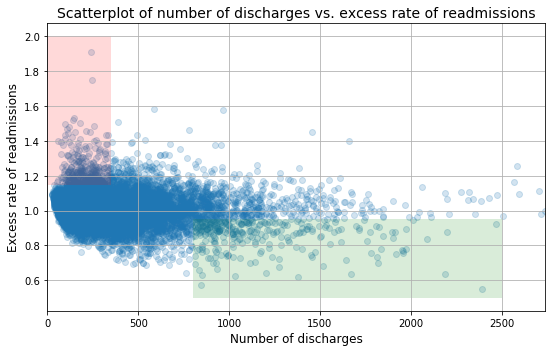

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

In [39]:
from scipy import stats
import seaborn as sns

A. Although the visuals and descriptive statistics support the argument we can not make conclusions based on these findings alone. To ensure the evidence is not due to chance one should perform a hypothesis test. 

Null Hypothesis: Hospitals with less than 300 discharges, on average, have the same excess rate of admissions as other hospitals
Alternative Hypothesis: Hospitals with less than 300 discharges, on average, have a higher excess rate of admissions as other hospitals

In [7]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [38]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)
df = pd.concat([x,y], axis=1)
df.columns = ['Discharges', 'Excess_Readmission_Ratio']
df.head()

,Discharges,Excess_Readmission_Ratio
0,25,1.0914
1,27,1.0961
2,28,1.0934
3,29,1.0908
4,30,1.1123


In [14]:
#Create functions to take bootstrap replicates of our sample data
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [32]:
#Create two samples: one containing hospitals with less than 300 discharges and one containing hospitals with more than 300 discharges
small_ratio = df[df['Discharges'] < 300]['Excess_Readmission_Ratio']
large_ratio = df[df['Discharges'] >= 300]['Excess_Readmission_Ratio']
print(np.mean(small_ratio))
print(np.mean(large_ratio))

1.0142382121807445
0.9999458410694383


In [30]:
#Create a confidence interval of the difference between hospitals with many discharges and fewer discharges
mean_diff = np.mean(large_ratio) - np.mean(small_ratio)
bs_replicates_small = draw_bs_reps(small_ratio, np.mean, 10000)
bs_replicates_big = draw_bs_reps(large_ratio, np.mean, 10000)
bs_diff_replicates = bs_replicates_big - bs_replicates_small
conf_int = np.percentile(bs_diff_replicates,[2.5,97.5])
print('95% confidence interval =', conf_int)

95% confidence interval = [-0.01765776 -0.01092017]


This confidence interval indicates that we can be 95% confident that hospitals with 300 or more discharges have, on average, an excess readmission ratio between .011 and .018 points lower than hospitals with less than 300 discharges.

In [33]:
combined_mean = np.mean(y)
large_shifted = large_ratio - np.mean(large_ratio) + combined_mean
small_shifted = small_ratio - np.mean(small_ratio) + combined_mean
bs_replicates_large = draw_bs_reps(large_shifted, np.mean, 10000)
bs_replicates_small = draw_bs_reps(small_shifted, np.mean, 10000)
bs_diff_replicates = bs_replicates_large - bs_replicates_small
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)
print('p =', p)

p = 0.0


C:\Users\Jai Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater_equal
  import sys


In [36]:
t, p = stats.ttest_ind(small_ratio, large_ratio, equal_var = False)
print('t =', t)
print("p =", p/2)

t = 8.239747233231238
p = 9.665825382542134e-17


From the T Test we can conclude that hospitals with 300 or more discharges have significantly less excess readmission ratios than hospitals with less than 300 discharges.

The scatterplot above shows the negative correlation between admissions and excess readmission ratios; however, a regression line will make the relationship clearer.

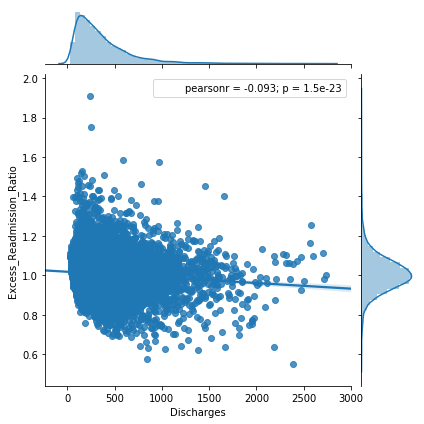

In [40]:
sns.jointplot('Discharges', 'Excess_Readmission_Ratio', data = df, kind='reg')

The visual above includes a regression line and a p value strengthening the point that excess readmission ratio falls as discharges increases.

Although there is a negative correlation, the data does not show what is causing the correlation. Hospital resources may be the cause, but we can not make that conclusion from this analysis.